# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [7]:
! git clone https://github.com/smerashanmugan/scratchpad
%run ./scratchpad/get_data.py
import pandas as pd
df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding = 'latin1')
var = "Price"
df[var].describe()
df["Price"].dtype
df[var] = (
    df[var]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)
df[var] = pd.to_numeric(df[var], errors="coerce")
df[var].describe()
df[var].isnull().sum()

fatal: destination path 'scratchpad' already exists and is not an empty directory.


np.int64(0)

1. So I imported all of the data that I needed. I first decided to check and see how pandas is treating the Price variable. Based off of my findings, the data was being treated like an object and not a numeric.Because of this, I decided to remove anything that could be causing the price data to be turned into an object(so I removed dollar signs and commas).I coerced the price variable into a numeric and any non numeric entries were then turned into missing values and then I checked to see if pandas was treating the data as a numeric, which it was. Finally, I checked to see if there were any missing data and the result showed me that there was no missing data.

In [9]:
import pandas as pd
df = pd.read_csv('/content/data/mn_police_use_of_force.csv', encoding='latin1')
df["subject_injury"].unique()
df["subject_injury"].value_counts(dropna=False)
df["subject_injury_clean"] = df["subject_injury"]
df["subject_injury_clean"].isnull().sum()
df["subject_injury_clean"].isnull().mean()
pd.crosstab(df["force_type"], df["subject_injury_clean"], dropna=False)
df.loc[df["subject_injury_clean"].isnull(), "subject_injury_clean"] = "Missing"
df["subject_injury_clean"].value_counts(dropna=False)

,count
subject_injury_clean,
Missing,9848
Yes,1631
No,1446


2. The proportion of values that are missing is 76%.When cross tabulating the data, the pattern is that bodily force,chemical irritant, and taser all are force types with a lot of missing information meanwhile firearm and less lethal projectiles have no missing data reported.

Question 3 is below this:

In [11]:
import pandas as pd
df = pd.read_csv('/content/data/metabric.csv', encoding='latin1')
df.columns
df["Overall Survival Status"].unique()
df["Overall Survival Status"].value_counts(dropna=False)
df["overall_survival_dummy"] = df["Overall Survival Status"]
df.loc[df["overall_survival_dummy"] == "0:LIVING", "overall_survival_dummy"] = 1
df.loc[df["overall_survival_dummy"] == "1:DECEASED", "overall_survival_dummy"] = 0
df["overall_survival_dummy"].value_counts(dropna=False)

,count
overall_survival_dummy,
0,768
1,575


In [12]:
import pandas as pd
df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin1')
df.columns
df["Review Scores Rating"].isnull().sum()
df["Review Scores Rating"].describe()
median_rating = df["Review Scores Rating"].median()
df["Review Scores Rating_imputed"] = df["Review Scores Rating"]
df["Review Scores Rating_imputed"] = df["Review Scores Rating_imputed"].fillna(median_rating)
df["Review Scores Rating_imputed"].isnull().sum()

np.int64(0)

4. There were 8,323 missing values in the category Review Scores Rating.This can negatively impact the data because filling in missing values can misinform the reader that there is no missing information and provide them with information that treats the observations as if they had real information.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,497,12,12
Unknown,368,400,124
Unprovoked,3373,58,694


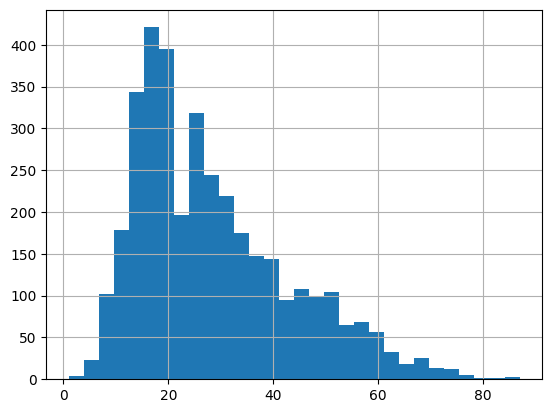

In [29]:
import pandas as pd
df = pd.read_excel("GSAF5.xls")
df.shape
df.columns
df.head()
df = df.drop(
    [
        'pdf',
        'href formula',
        'href',
        'Case Number',
        'Case Number.1',
        'original order',
        'Unnamed: 21',
        'Unnamed: 22'
    ],
    axis=1
)
df["Year"].unique()
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Year"].describe()
df = df[df["Year"] >= 1940]
df["Year"].value_counts().sort_index()
df["Age"].unique()
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Age"].hist(bins=30)
df["Type"].unique()
df["Type_clean"] = df["Type"]
df.loc[df["Type_clean"] == "Provoked", "Type_clean"] = "Provoked"
df.loc[df["Type_clean"] == "Unprovoked", "Type_clean"] = "Unprovoked"
df.loc[~df["Type_clean"].isin(["Provoked", "Unprovoked"]), "Type_clean"] = "Unknown"
df["Type_clean"].value_counts()
df["Fatal Y/N"].unique()
df["Fatal_clean"] = df["Fatal Y/N"]
df.loc[df["Fatal_clean"] == "Y", "Fatal_clean"] = "Y"
df.loc[df["Fatal_clean"] == "N", "Fatal_clean"] = "N"
df.loc[~df["Fatal_clean"].isin(["Y", "N"]), "Fatal_clean"] = "Unknown"
pd.crosstab(df["Type_clean"], df["Fatal_clean"])

1. pd.read_excel works because the dataset is stored as an excel sheet.
2. shown above
3. An observation would be classified as a single shark attack incident. This is because each row in the dataset represents a singular attack and each column in the dataset represents the details of the attack.Because of this it is important to clean the data within each incident that is observed so that we can get accurate informationa and it makes it much easier to analyze the information but it could also change the data analyses if the missing information is removed for the purposes of cleaning the data.
4. The year variable contains a large range of values with very early years being part of the record to more modern years (this year 2026)). After filtering the data I can say that the number of shark attacks has increased over time.
5. shown above
6. 74% of attacks are unprovoked.
7. shown above
8. Based on the data, unprovoked attacks are more likely to be fatal. This is terrifying and another reason why I probably would not swim in the ocean voluntarily but look at it from a distance or go on a cruise(I love the ocean).


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. This paper is about tidying datasets which is a specific part of cleaning data. In data tidying, the focus is on organizing the data in a manner that is consistent and is easy to analyse, model, and visualize.
2. The standard for tidy data is there to make it easier work with the data by organizing it in a consistent structure so the people analyzing the data can focus on analyzing the data and not actually fixing the data.
3. The sentence "Like families, tidy datasets are all alike but every messy dataset is messy in its own way," is basically implying that tidy datasets all follow the same set of rules and messy datasets can be disorganized in multiple different ways. The sentence "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general," implies that within a specific dataset it is typically very simple to understand the observations and variables but it is hard to define them in a way that can work for every type of data.
4. Wickham defines values as individual data points, variables describe what is being measured, and observations describe what is being measured.
5. Tidy data in section 2.3 is defined as a consistent structure in which rows represent observations, columns represent variables, and different kinds of data are held in seperate tables.
6. The 5 most common problems with messy data:
  - Column headers are values, not variable names
  - Multiple variables are stored in one column
  - Variables are stored in both rows and columns
  - Multiple types of observational units are stored in the same table
  -  A single observational unit is stored in multiple tables
The data in table 4 is messy because the column headers represent the variable values rather than the names of the variables.Melting a dataset is basically the process of turning columns into rows.
7. Table 11 is considered messy because days are stored as column headers and in table 12 those columns are melted into rows and in the other table 12 the data is tidy because each variable has its own column and each row is an observation.


**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


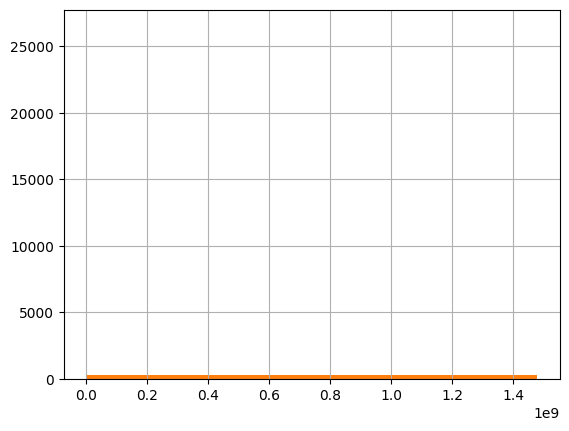

In [45]:
import pandas as pd
df = pd.read_csv('/content/data/ForeignGifts_edu.csv', encoding='latin1')
df.shape
df.columns
df.dtypes
df['Foreign Gift Amount'].describe()
df['Foreign Gift Amount'].hist(bins=50)
df['Gift Type'].value_counts()
df['Gift Type'].value_counts(normalize=True)
df.groupby('Country of Giftor').count()['Foreign Gift Amount'] \
  .sort_values(ascending=False).head(15)
df.groupby('Country of Giftor').sum()['Foreign Gift Amount'] \
  .sort_values(ascending=False).head(15)
df.groupby('Institution Name').sum()['Foreign Gift Amount'] \
  .sort_values(ascending=False).head(15)
inst_totals = df.groupby('Institution Name').sum()['Foreign Gift Amount']
inst_totals.hist(bins=1)
df.groupby('Giftor Name').sum()['Foreign Gift Amount'] \
  .sort_values(ascending=False).head(15)

1. shown above
2. The histogram is highly skewed to the right where a lot of the gifts were small with some being really large.
3. 61% of gifts are contracts, 38.7% are monetary gifts, and 0.039% are real estate.
4. The top 15 countries in terms of number of gifts are england, china, canada, japan,switzerland,saudi arabia,france,germany, hong kong, south korea,qatar, netherlands,korea,india,taiwan. The top 15 countries in terms of the amount given are qatar,england,china,saudi arabia, bermuda, canada,hong kong,japan,switzerland,india, germany,UAE,france,singapore,australia.
5. Carnegie Mellon,Cornell,Harvard,MIT, yale, texas A and M, Johns Hopkins, Northwestern, Georgetown,UChicago,University of Colorado Boulder,Duke, BYU,Stanford, University of Texas MD cancer center.
6. shown above
7. Qatar Foundation

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

aid_value  grad_100_value
control                                                         
Private for-profit     aid_value        1.000000        0.188363
                       grad_100_value   0.188363        1.000000
Private not-for-profit aid_value        1.000000        0.601591
                       grad_100_value   0.601591        1.000000
Public                 aid_value        1.000000        0.482481
                       grad_100_value   0.482481        1.000000

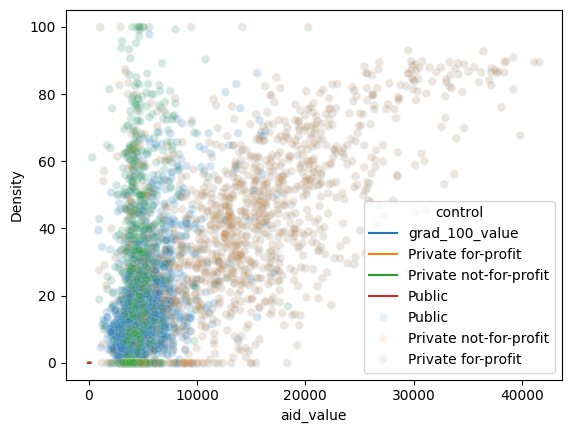

In [56]:
import pandas as pd

df = pd.read_csv('/content/data/college_completion.csv', encoding='latin1' )
df.shape
df.head()
pd.crosstab(df['control'], df['level'])
df['grad_100_value'].plot.kde()
df['grad_100_value'].describe()
df.groupby('control')['grad_100_value'].plot.kde()
df.groupby('control')['grad_100_value'].describe()
import seaborn as sns

sns.scatterplot(
    x=df['aid_value'],
    y=df['grad_100_value'],
    alpha=0.1
)
var_list = ['aid_value', 'grad_100_value']

df.loc[:, var_list].cov(numeric_only=True)
df.loc[:, var_list].corr(numeric_only=True)
sns.scatterplot(
    x=df['aid_value'],
    y=df['grad_100_value'],
    hue=df['control'],
    alpha=0.1
)
df.loc[:, ['aid_value', 'grad_100_value', 'control']] \
  .groupby('control') \
  .cov(numeric_only=True)
df.loc[:, ['aid_value', 'grad_100_value', 'control']] \
  .groupby('control') \
  .corr(numeric_only=True)

1. shown above
2. There are 3798 observations and 63 variables.
3. Public institutions are more likely to be 2 year schools, majority of 4 year schools are private not for profit private for profit have similar amounts of 2 and 4 year schools.
4. Private not for profit institution
5. The scatterplot shows an upwards trend that is postive with clustering towards the bottom of the scatterplot and more spread out towards the top.This could indicate that the higher average aid given have higher average graduation rates. In the second scatterplot, the private not for profit institutions showed a clear upwards trend and public institutions also showed a positive relationship.Private  for profit showed a weak positive correlation.Aid seems to vary positively with graduation rates at private not for profit institutions.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

,price_winsor
count,2930.000000
mean,177632.528669
std,66195.453960
min,87500.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,335000.000000


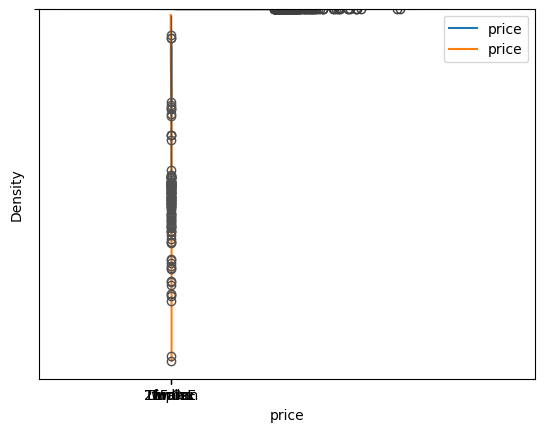

In [67]:
import pandas as pd

df = pd.read_csv('/content/data/ames_prices.csv', encoding='latin1')
df['price'].plot.kde()
df['price'].describe()
import seaborn as sns

sns.kdeplot(
    data=df,
    x='price',
    hue='Bldg.Type',
    common_norm=False
)
df.loc[:, ['price', 'Bldg.Type']].groupby('Bldg.Type').describe()
df['price'].sort_values().reset_index(drop=True).plot()
df['price'].quantile([0, 0.25, 0.5, 0.75, 1])
sns.boxplot(x=df['price'])
sns.boxplot(
    x=df['Bldg.Type'],
    y=df['price']
)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df['price_outlier'] = (
    (df['price'] < Q1 - 1.5 * IQR) |
    (df['price'] > Q3 + 1.5 * IQR)
).astype(int)
lower = df['price'].quantile(0.05)
upper = df['price'].quantile(0.95)

df['price_winsor'] = df['price'].clip(lower, upper)
df['price_winsor'].plot.kde()
df['price_winsor'].describe()

1. shown above
2. TwnhsE are the most expensive on average and 1Fam has the highest variance in transaction prices.
3. shown above
4. Yes there are outliers.The building types strongly influence the price distributions.Single family homes tend to have the most outliers in the price distribution and most variance.Two family conversions have the lowest variation in prices.
5. The results change because the extremely high and low values are removed(outliers) which then reduces variation and so the kernel density plot becomes more concentrated.